In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
class EdgeGetter(object):

    def __init__(self):

        self.image = cv2.imread('original.jpg')
        self.image_copy = np.copy(self.image)
        self.image_copy = cv2.cvtColor(self.image_copy, cv2.COLOR_BGR2RGB)
        self.gray = cv2.cvtColor(self.image_copy, cv2.COLOR_RGB2GRAY)
        self.blur = cv2.GaussianBlur(self.gray, (3, 3), 0)  # Applied low pass filter blur
        self.sobel_matrix = np.array([[-1, 0, 1],
                                      [-2, 0, 2],
                                      [-1, 0, 1]
                                      ])  # Vertical sobel filter to get vertical edges
        self.filtered_x = cv2.filter2D(self.blur, -1, self.sobel_matrix)
        self.filtered_y = cv2.filter2D(self.blur, -1, +-self.sobel_matrix)
        self.filtered = cv2.bitwise_or(self.filtered_x, self.filtered_y)
        self.ret, self.binary = cv2.threshold(self.filtered, 100, 255, cv2.THRESH_BINARY)

        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))
        ax1.set_title("Normal")
        ax1.imshow(self.image_copy, cmap="gray")
        ax2.set_title("Filtered")
        ax2.imshow(self.filtered, cmap="gray")
        plt.show()
        print(self.image.shape)

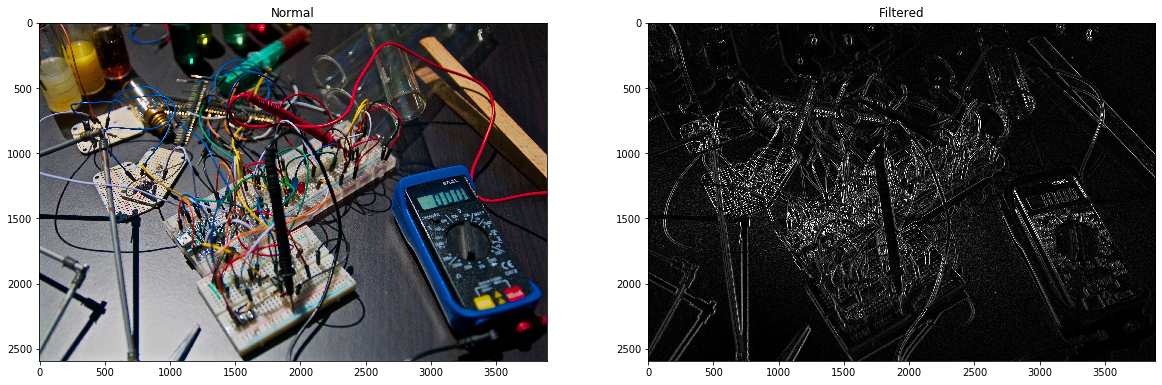

(2592, 3888, 3)


In [16]:
EdgeGetter()